In [8]:
# Importing the libraries

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Basic information

In [11]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
df.shape

(284807, 31)

In [13]:
# We have 31 columns in the dataset

In [14]:
# Checked all the value counts and apart from 'Class', all others have numerical values 

In [15]:
# We don't have null values in any of the columns

In [16]:
# All the columns are PCA transformed, hence moving ahead

In [17]:
classes = df['Class'].value_counts()

In [18]:
normal_transaction = classes[0] / df['Class'].count()
fraud_transaction = classes[1] / df['Class'].count()

In [19]:
normal_transaction = normal_transaction * 100
fraud_transaction = fraud_transaction * 100

print('There are', round(normal_transaction, 2), '% normal transactions in the dataset')
print('There are', round(fraud_transaction, 2), '% fraud transactions in the dataset')

There are 99.83 % normal transactions in the dataset
There are 0.17 % fraud transactions in the dataset


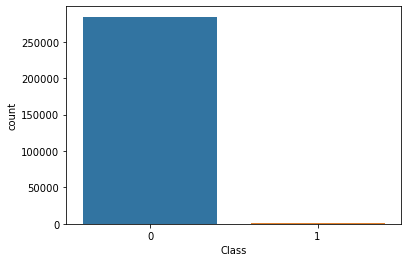

In [20]:
sns.countplot(df['Class'])
plt.show()

In [21]:
df_fraud = df[df['Class'] == 1]
df_normal = df[df['Class'] == 0]

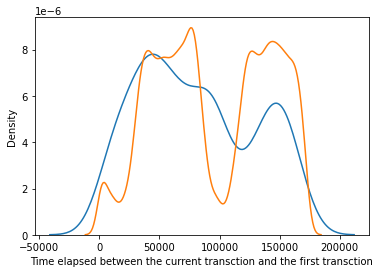

In [22]:
pl = sns.distplot(df_fraud['Time'], label = 'Fraud Transactions', hist = False)
pl = sns.distplot(df_normal['Time'], label = 'Normal Transactions', hist = False)
pl.set(xlabel = 'Time elapsed between the current transction and the first transction')
plt.show()

In [23]:
# We don't see any specific pattern for both transactions w.r.t 'Time'

In [24]:
df.drop('Time', axis = 1, inplace = True)

In [25]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

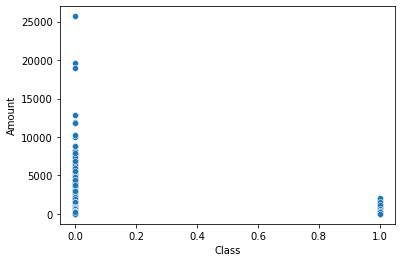

In [26]:
sns.scatterplot(df['Class'], df['Amount'])
plt.show()

In [27]:
# Fraudulent transactions seems to be with lower amount and not with higher ones

In [28]:
# Now we have divided the data into train and test

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = df.drop(['Class'], axis = 1)
y = df['Class']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3,stratify=y, random_state = 42)

In [32]:
# We will perform scaling on the 'Amount' variable 

In [33]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_test['Amount'] = scaler.transform(X_test[['Amount']])

#### Data Skewness Test for features columns

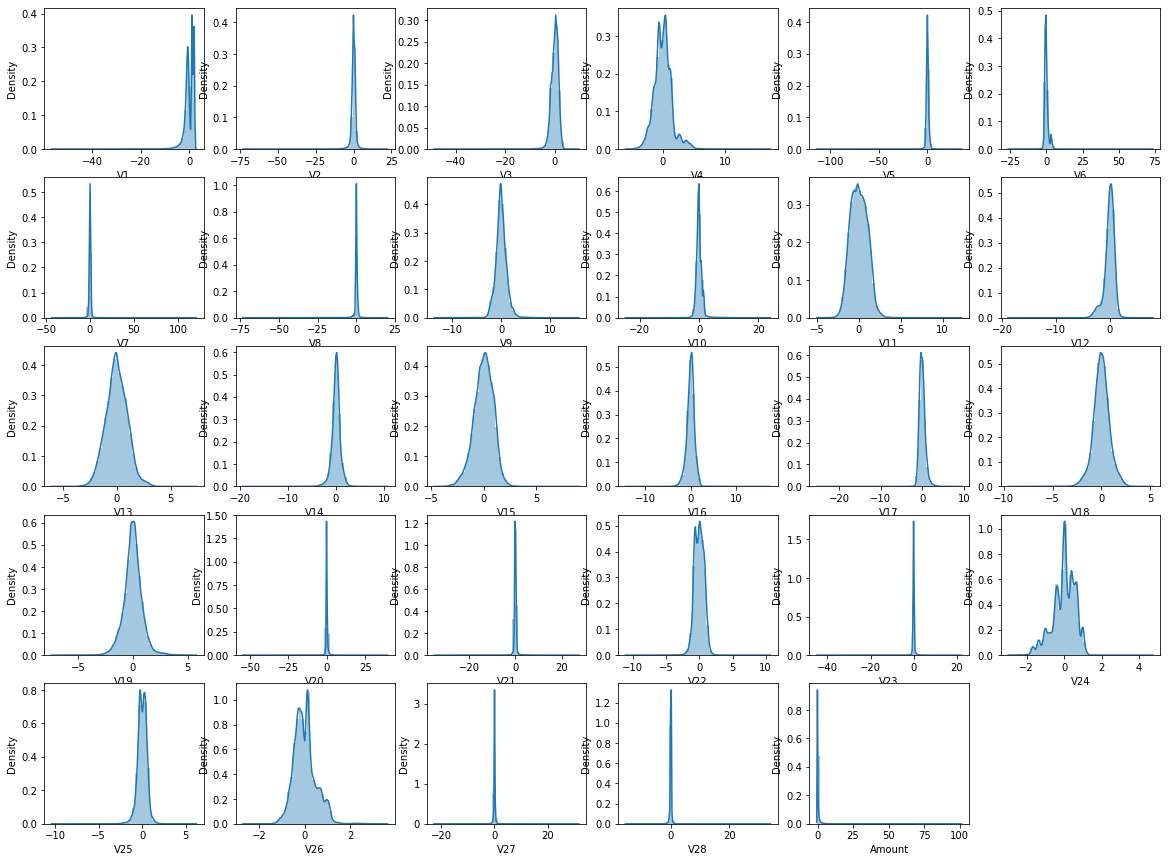

In [30]:
plt.figure(figsize=(20,15))
i=0
for col in X_train.columns:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_train[col])

plt.show()

Reference document for data skewness - 
https://www.simplilearn.com/tutorials/statistics-tutorial/skewness-and-kurtosis#what_is_a_normal_distribution

In [31]:
# Since the data varaibles are highly skewed for few varaibles, we will check the skewness values of each variable and power transform

In [32]:
skewed_var_list = []
for i in X_train.columns:
    if(X_train[i].skew() > 1 or X_train[i].skew() < -1):
        skewed_var_list.append(i)
skewed_var_list

['V1',
 'V2',
 'V3',
 'V5',
 'V6',
 'V7',
 'V8',
 'V10',
 'V12',
 'V14',
 'V16',
 'V17',
 'V20',
 'V21',
 'V23',
 'V28',
 'Amount']

In [33]:
from sklearn.preprocessing import PowerTransformer
import warnings
np.warnings = warnings

In [34]:
power_trans = PowerTransformer(copy=False)

In [35]:
for i in skewed_var_list:
    X_train[i] = power_trans.fit_transform(X_train[[i]])
    X_test[i] = power_trans.transform(X_test[[i]])

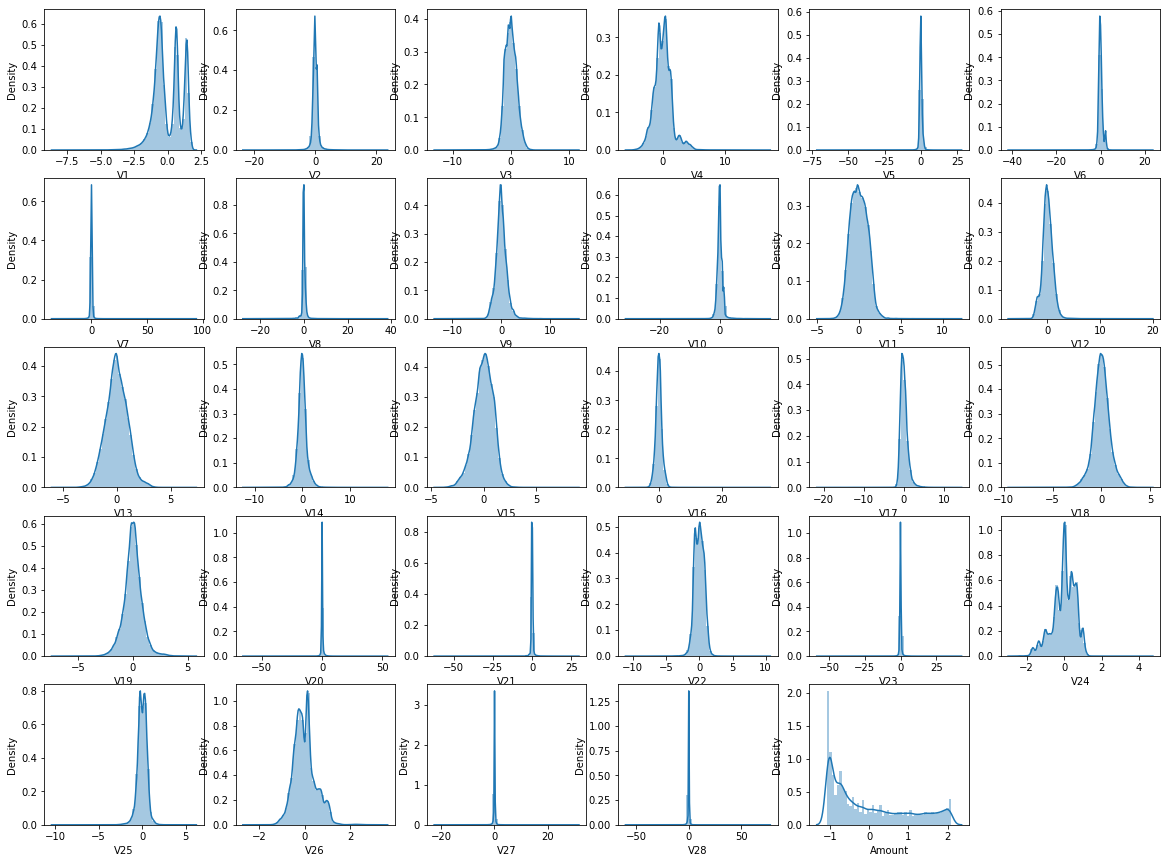

In [36]:
plt.figure(figsize=(20,15))
i=0
for col in X_train.columns:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_train[col])

plt.show()

In [37]:
skewed_var_list = []
for i in X_train.columns:
    if(X_train[i].skew() > 1 or X_train[i].skew() < -1):
        skewed_var_list.append(i)
skewed_var_list

['V5', 'V6', 'V7', 'V8', 'V10', 'V21', 'V28']

https://bobrupakroy.medium.com/powertransformer-f259276ccb0

In [38]:
# We will work on the imbalanced dataset with 3 models - Decsion Tree, Logistic Regreession and XG Boost

In [39]:
# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [41]:
num_C = {"C": [0.01, 0.1, 1, 10, 100, 1000]}  #--> list of values
cv_num = KFold(n_splits=5, shuffle=True, random_state=4)  #--> list of values

In [42]:
#perform cross validation

model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = num_C, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 

#perform hyperparameter tuning
model_cv.fit(X_train, y_train)

#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9852706290312317
Best hyperparameters:  {'C': 0.01}


In [45]:
log_model = LogisticRegression(C=0.01)
log_model.fit(X_train, y_train)
y_train_pred = log_model.predict(X_train)

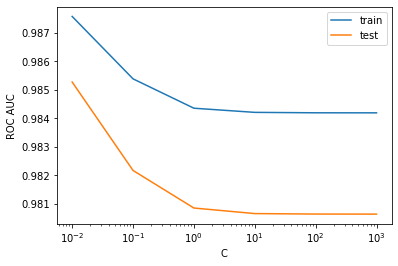

In [46]:
mod_cv_results = pd.DataFrame(model_cv.cv_results_)

plt.plot(mod_cv_results['param_C'], mod_cv_results['mean_train_score'])
plt.plot(mod_cv_results['param_C'], mod_cv_results['mean_test_score'])
plt.xlabel('C')
plt.ylabel('ROC AUC')
plt.xscale('log')
plt.legend(['train', 'test'])
plt.show()

In [47]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [48]:
def derive_metrics(y_train,y_train_pred):
    
    conf = metrics.confusion_matrix(y_train, y_train_pred)
    TP = conf[1,1]
    TN = conf[0,0]
    FP = conf[0,1]
    FN = conf[1,0]
    Accuracy = metrics.accuracy_score(y_train, y_train_pred)
    Sensitivity = TP / float(TP+FN)
    Specificity = TN / float(TN+FP)
    F1_Score = f1_score(y_train, y_train_pred)
    return Accuracy,Sensitivity,Specificity,F1_Score

In [2]:
# Creating function to display ROC-AUC score, f1 score and classification report
from sklearn.metrics import f1_score, classification_report

def display_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

In [50]:
print("Accuracy:-",derive_metrics(y_train,y_train_pred)[0])
print("Sensitivity:-",derive_metrics(y_train,y_train_pred)[1])
print("Specificity:-", derive_metrics(y_train,y_train_pred)[2])
print("F1-Score:-", derive_metrics(y_train,y_train_pred)[3])

Accuracy:- 0.999247607391505
Sensitivity:- 0.627906976744186
Specificity:- 0.9998894583458949
F1-Score:- 0.7422680412371133


In [51]:
display_scores(y_train,y_train_pred)

F1 Score: 74.23%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.91      0.63      0.74       344

    accuracy                           1.00    199364
   macro avg       0.95      0.81      0.87    199364
weighted avg       1.00      1.00      1.00    199364



In [52]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [53]:
y_train_pred_proba = log_model.predict_proba(X_train)[:, 1]

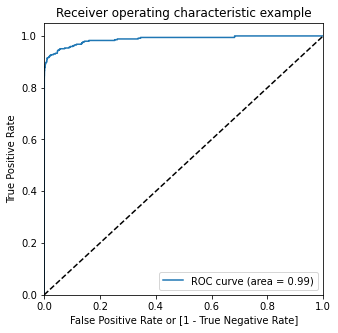

In [54]:
draw_roc(y_train, y_train_pred_proba)

In [55]:
y_test_pred = log_model.predict(X_test)

In [56]:
print("Accuracy:-",derive_metrics(y_test,y_test_pred)[0])
print("Sensitivity:-",derive_metrics(y_test,y_test_pred)[1])
print("Specificity:-", derive_metrics(y_test,y_test_pred)[2])
print("F1-Score:-", derive_metrics(y_test,y_test_pred)[3])

Accuracy:- 0.999133925541004
Sensitivity:- 0.5945945945945946
Specificity:- 0.9998358637669266
F1-Score:- 0.7040000000000001


In [57]:
display_scores(y_train,y_train_pred)

F1 Score: 74.23%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.91      0.63      0.74       344

    accuracy                           1.00    199364
   macro avg       0.95      0.81      0.87    199364
weighted avg       1.00      1.00      1.00    199364



In [58]:
y_test_pred_proba = log_model.predict_proba(X_test)[:, 1]

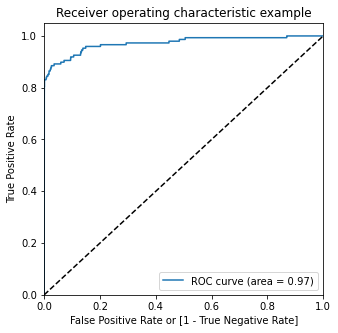

In [59]:
draw_roc(y_test, y_test_pred_proba)

In [60]:
# Decsion Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
param_grid = {
    'max_depth' : range(5, 15, 5),
    'min_samples_leaf' : range(50, 150, 50),
    'min_samples_split' : range(50, 150, 50)
}

dtr = DecisionTreeClassifier()

mod_cv = GridSearchCV(estimator = dtr,
                     param_grid = param_grid,
                     scoring = 'roc_auc',
                     cv = 3,
                     n_jobs = -1,
                     verbose = 1)
mod_cv.fit(X_train, y_train)
print(mod_cv.best_score_)
print(mod_cv.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
0.9479356945907563
{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}


In [63]:
# mod_cv_results = pd.DataFrame(mod_cv.cv_results_)

In [65]:
# Fit model with the best params
dtr_model = DecisionTreeClassifier(criterion = 'gini',
                                  random_state = 100,
                                  max_depth = 10,
                                  min_samples_leaf = 50,
                                  min_samples_split = 50
                                  )

dtr_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [66]:
y_train_pred = dtr_model.predict(X_train)
# print(classification_report(y_train, y_train_pred))

In [67]:
print("Accuracy:-",derive_metrics(y_train,y_train_pred)[0])
print("Sensitivity:-",derive_metrics(y_train,y_train_pred)[1])
print("Specificity:-", derive_metrics(y_train,y_train_pred)[2])
print("F1-Score:-", derive_metrics(y_train,y_train_pred)[3])

Accuracy:- 0.9992175116871652
Sensitivity:- 0.6569767441860465
Specificity:- 0.9998090644156367
F1-Score:- 0.743421052631579


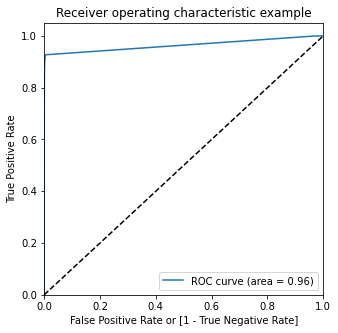

In [68]:
y_train_pred_proba = dtr_model.predict_proba(X_train)[:, 1]
draw_roc(y_train, y_train_pred_proba)

In [69]:
display_scores(y_train,y_train_pred)

F1 Score: 74.34%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.86      0.66      0.74       344

    accuracy                           1.00    199364
   macro avg       0.93      0.83      0.87    199364
weighted avg       1.00      1.00      1.00    199364



In [70]:
y_test_pred = dtr_model.predict(X_test)
display_scores(y_test,y_test_pred)

F1 Score: 68.97%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.80      0.61      0.69       148

    accuracy                           1.00     85443
   macro avg       0.90      0.80      0.84     85443
weighted avg       1.00      1.00      1.00     85443



In [71]:
print("Accuracy:-",derive_metrics(y_test,y_test_pred)[0])
print("Sensitivity:-",derive_metrics(y_test,y_test_pred)[1])
print("Specificity:-", derive_metrics(y_test,y_test_pred)[2])
print("F1-Score:-", derive_metrics(y_test,y_test_pred)[3])

Accuracy:- 0.9990519995786665
Sensitivity:- 0.6081081081081081
Specificity:- 0.9997303476170936
F1-Score:- 0.689655172413793


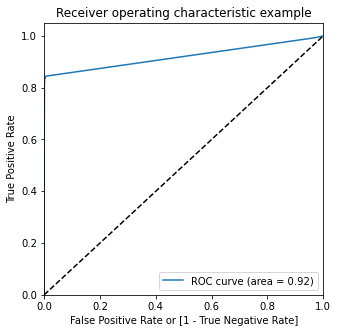

In [72]:
y_test_pred_proba = dtr_model.predict_proba(X_test)[:, 1]
draw_roc(y_test, y_test_pred_proba)

In [73]:
# XGBoost

In [74]:
%%time

from xgboost import XGBClassifier

folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9],
             'max_depth': range(5,10,5)
             }          


# specify model
xgb_model = XGBClassifier(n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Wall time: 2min


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'max_depth': range(5, 10, 5),
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [75]:
# mod_cv_results = pd.DataFrame(mod_cv.cv_results_)
# mod_cv_results
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)
print(model_cv.best_params_)

Best roc auc score :  0.9808141052484404
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
{'learning_rate': 0.2, 'max_depth': 5, 'subsample': 0.3}


In [87]:
# Printing best parameters
params = {'learning_rate': 0.2,
          'max_depth': 5, 
          'n_estimators':200,
          'subsample':0.3,
          'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3}, ...)

In [88]:
y_train_pred = xgb_imb_model.predict(X_train)

In [89]:
print("Accuracy:-",derive_metrics(y_train,y_train_pred)[0])
print("Sensitivity:-",derive_metrics(y_train,y_train_pred)[1])
print("Specificity:-", derive_metrics(y_train,y_train_pred)[2])
print("F1-Score:-", derive_metrics(y_train,y_train_pred)[3])

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0


In [90]:
# Predictions on the train set

display_scores(y_train, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00       344

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364



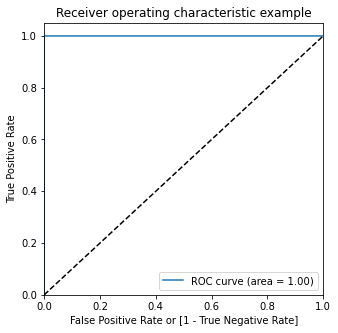

In [91]:
y_train_pred_proba = xgb_imb_model.predict_proba(X_train)[:, 1]
draw_roc(y_train, y_train_pred_proba)

In [92]:
y_test_pred = xgb_imb_model.predict(X_test)
display_scores(y_test,y_test_pred)
# print(classification_report(y_test, y_test_pred))

F1 Score: 83.58%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.93      0.76      0.84       148

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [93]:
print("Accuracy:-",derive_metrics(y_test,y_test_pred)[0])
print("Sensitivity:-",derive_metrics(y_test,y_test_pred)[1])
print("Specificity:-", derive_metrics(y_test,y_test_pred)[2])
print("F1-Score:-", derive_metrics(y_test,y_test_pred)[3])

Accuracy:- 0.9994850368081645
Sensitivity:- 0.7567567567567568
Specificity:- 0.9999062078668152
F1-Score:- 0.835820895522388


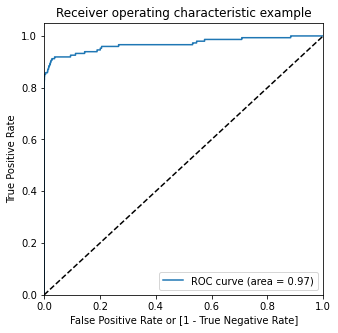

In [94]:
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:, 1]
draw_roc(y_test, y_test_pred_proba)

- We have chosen XGBoost model to be the best on Imbalanced dataset because of 0.98 of ROC curve area and descent F1-score for both train and test data

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 14
2nd Top var = 10
3rd Top var = 12


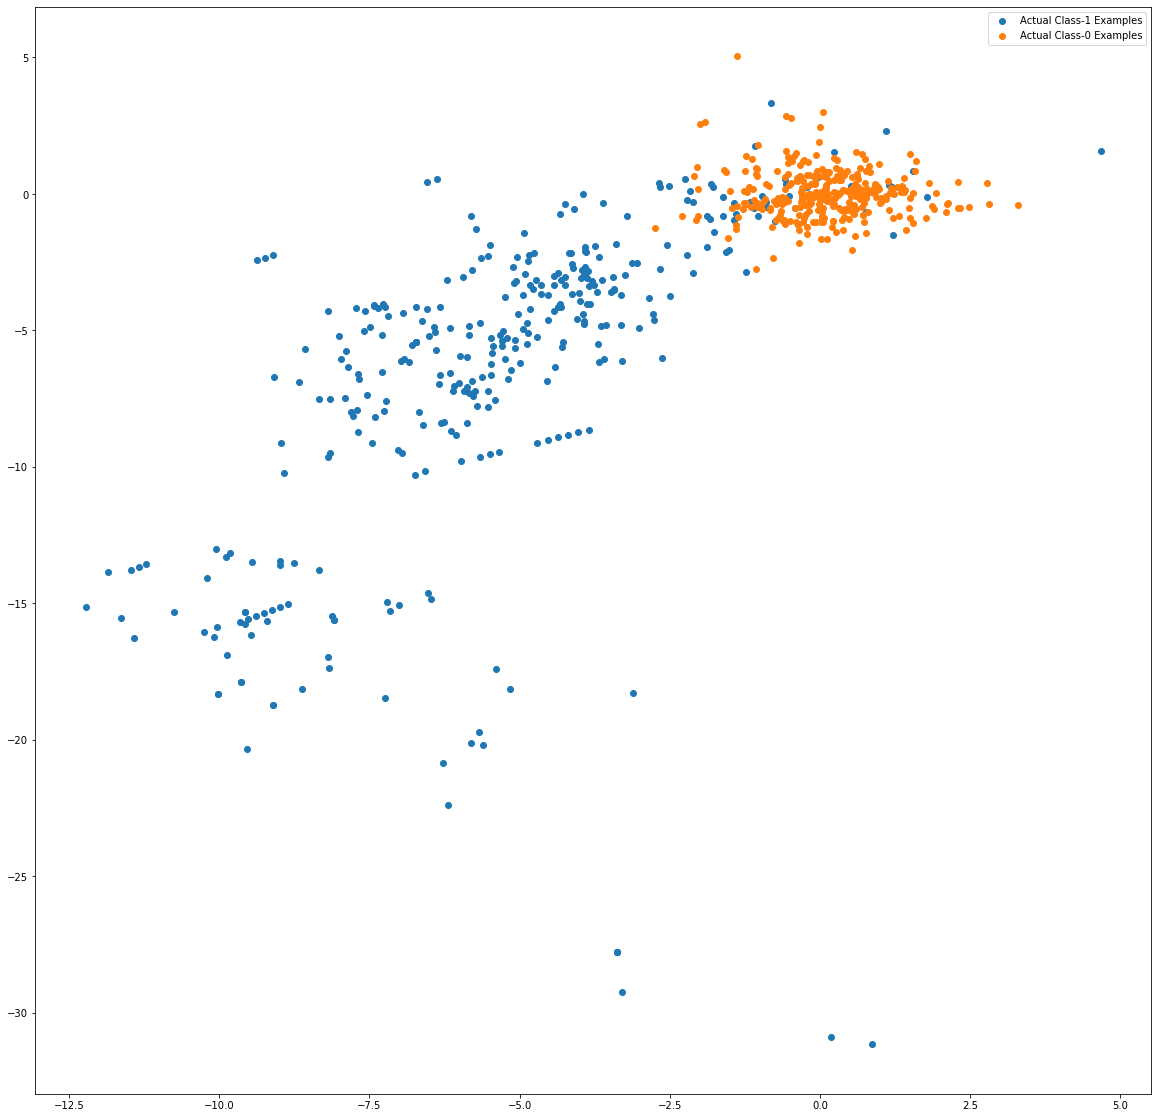

In [95]:
var_imp = []
for i in xgb_imb_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [146]:
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 1.0
0.8154602


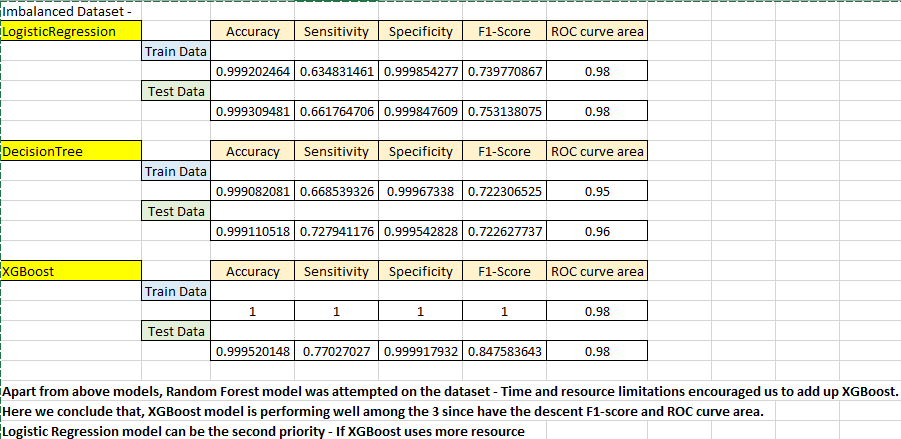

In [ ]:
# SMOTE

In [96]:
from imblearn.over_sampling import SMOTE

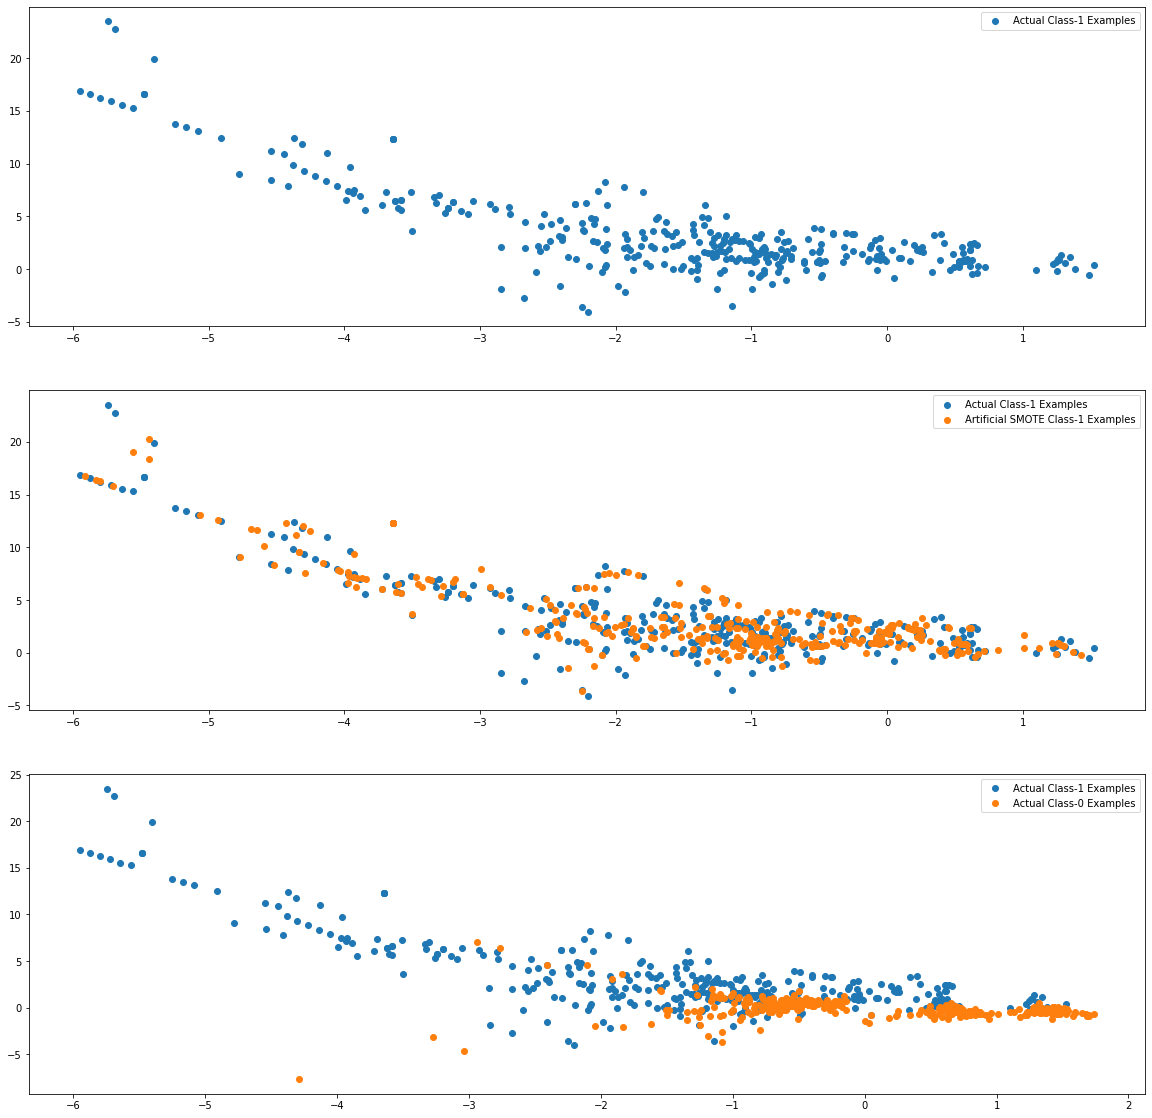

In [97]:
import warnings
warnings.filterwarnings("ignore")


sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1], label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [98]:
y_train_smote.value_counts()

1    199020
0    199020
Name: Class, dtype: int64

In [236]:
# Logistic Regression

In [237]:
num_C = {"C": [0.01, 0.1, 1, 10, 100, 1000]}  #--> list of values
cv_num = KFold(n_splits=5, shuffle=True, random_state=4)  #--> list of values

In [238]:
#perform cross validation

model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = num_C, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 

#perform hyperparameter tuning
model_cv.fit(X_train_smote, y_train_smote)

#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9914888587428161
Best hyperparameters:  {'C': 100}


In [239]:
log_model = LogisticRegression(C=100)
log_model.fit(X_train_smote, y_train_smote)
y_train_pred_smote = log_model.predict(X_train_smote)

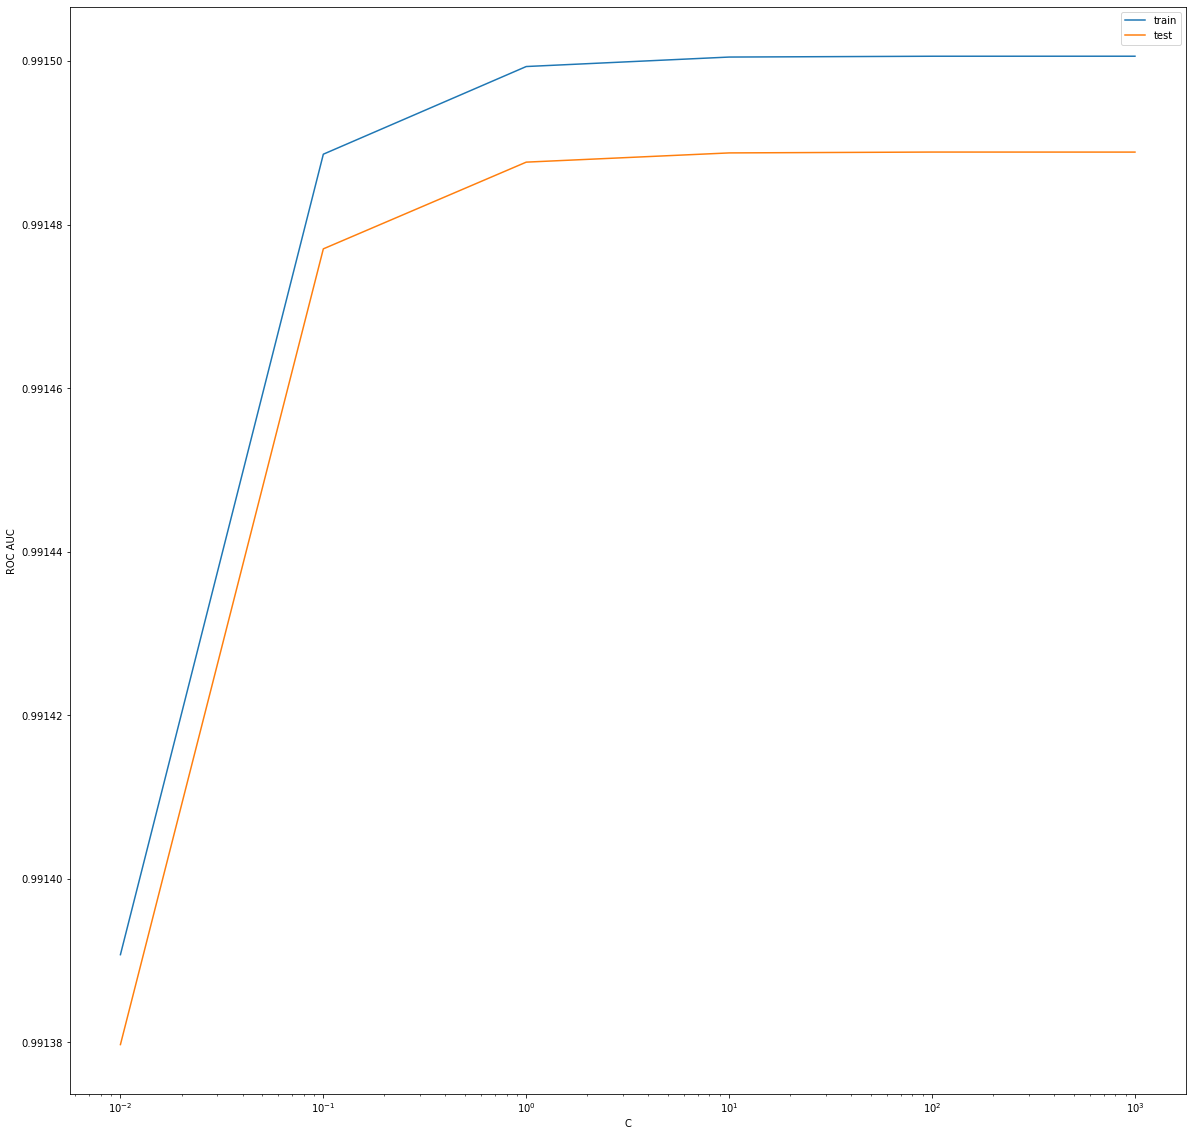

In [240]:
mod_cv_results = pd.DataFrame(model_cv.cv_results_)

plt.plot(mod_cv_results['param_C'], mod_cv_results['mean_train_score'])
plt.plot(mod_cv_results['param_C'], mod_cv_results['mean_test_score'])
plt.xlabel('C')
plt.ylabel('ROC AUC')
plt.xscale('log')
plt.legend(['train', 'test'])
plt.show()

In [241]:
print("Accuracy:-",derive_metrics(y_train_smote,y_train_pred_smote)[0])
print("Sensitivity:-",derive_metrics(y_train_smote,y_train_pred_smote)[1])
print("Specificity:-", derive_metrics(y_train_smote,y_train_pred_smote)[2])
print("F1-Score:-", derive_metrics(y_train_smote,y_train_pred_smote)[3])

Accuracy:- 0.9567480655210532
Sensitivity:- 0.9374334237765048
Specificity:- 0.9760627072656014
F1-Score:- 0.9558962167479608


In [242]:
display_scores(y_train_smote,y_train_pred_smote)

F1 Score: 95.59%
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96    199020
           1       0.98      0.94      0.96    199020

    accuracy                           0.96    398040
   macro avg       0.96      0.96      0.96    398040
weighted avg       0.96      0.96      0.96    398040



In [243]:
y_train_pred_proba_smote = log_model.predict_proba(X_train_smote)[:, 1]

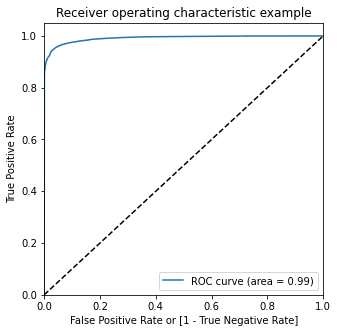

In [244]:
draw_roc(y_train_smote, y_train_pred_proba_smote)

In [245]:
y_test_pred_smote = log_model.predict(X_test)

In [246]:
print("Accuracy:-",derive_metrics(y_test,y_test_pred)[0])
print("Sensitivity:-",derive_metrics(y_test,y_test_pred)[1])
print("Specificity:-", derive_metrics(y_test,y_test_pred)[2])
print("F1-Score:-", derive_metrics(y_test,y_test_pred)[3])

Accuracy:- 0.9994850368081645
Sensitivity:- 0.7567567567567568
Specificity:- 0.9999062078668152
F1-Score:- 0.835820895522388


In [247]:
display_scores(y_test,y_test_pred_smote)

F1 Score: 10.96%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.88      0.11       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443



In [248]:
y_test_pred_proba_smote = log_model.predict_proba(X_test)[:, 1]

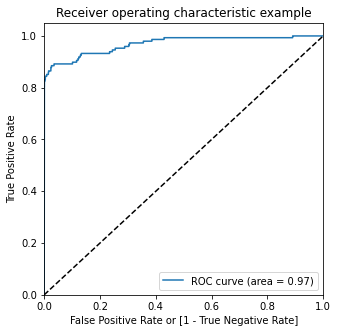

In [249]:
draw_roc(y_test, y_test_pred_proba_smote)

In [117]:
# Decsion Tree

In [118]:
param_grid = {
    'max_depth' : range(5, 15, 5),
    'min_samples_leaf' : range(50, 150, 50),
    'min_samples_split' : range(50, 150, 50)
}

dtr_smote = DecisionTreeClassifier()

mod_cv = GridSearchCV(estimator = dtr,
                     param_grid = param_grid,
                     scoring = 'roc_auc',
                     cv = 3,
                     n_jobs = -1,
                     verbose = 1)
mod_cv.fit(X_train_smote, y_train_smote)
print(mod_cv.best_score_)
print(mod_cv.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
0.9985802012238625
{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 100}


In [119]:
# mod_cv_results = pd.DataFrame(mod_cv.cv_results_)

In [121]:
# Fit model with the best params
dtr_smote_model = DecisionTreeClassifier(criterion = 'gini',
                                  random_state = 100,
                                  max_depth = 10,
                                  min_samples_leaf = 50,
                                  min_samples_split = 100
                                  )

dtr_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

In [122]:
y_train_pred_smote = dtr_smote_model.predict(X_train_smote)
# print(classification_report(y_train, y_train_pred))

In [123]:
print("Accuracy:-",derive_metrics(y_train_smote,y_train_pred_smote)[0])
print("Sensitivity:-",derive_metrics(y_train_smote,y_train_pred_smote)[1])
print("Specificity:-", derive_metrics(y_train_smote,y_train_pred_smote)[2])
print("F1-Score:-", derive_metrics(y_train_smote,y_train_pred_smote)[3])

Accuracy:- 0.9869334740227113
Sensitivity:- 0.9830268314742237
Specificity:- 0.9908401165711989
F1-Score:- 0.9868822275748136


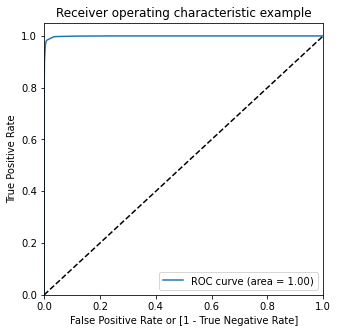

In [124]:
y_train_pred_proba_smote = dtr_smote_model.predict_proba(X_train_smote)[:, 1]
draw_roc(y_train_smote, y_train_pred_proba_smote)

In [125]:
display_scores(y_train_smote,y_train_pred_smote)

F1 Score: 98.69%
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99    199020
           1       0.99      0.98      0.99    199020

    accuracy                           0.99    398040
   macro avg       0.99      0.99      0.99    398040
weighted avg       0.99      0.99      0.99    398040



In [126]:
y_test_pred_smote = dtr_smote_model.predict(X_test)
display_scores(y_test,y_test_pred_smote)

F1 Score: 20.27%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.12      0.80      0.20       148

    accuracy                           0.99     85443
   macro avg       0.56      0.89      0.60     85443
weighted avg       1.00      0.99      0.99     85443



In [127]:
print("Accuracy:-",derive_metrics(y_test,y_test_pred_smote)[0])
print("Sensitivity:-",derive_metrics(y_test,y_test_pred_smote)[1])
print("Specificity:-", derive_metrics(y_test,y_test_pred_smote)[2])
print("F1-Score:-", derive_metrics(y_test,y_test_pred_smote)[3])

Accuracy:- 0.9891389581358332
Sensitivity:- 0.7972972972972973
Specificity:- 0.989471833050003
F1-Score:- 0.2027491408934708


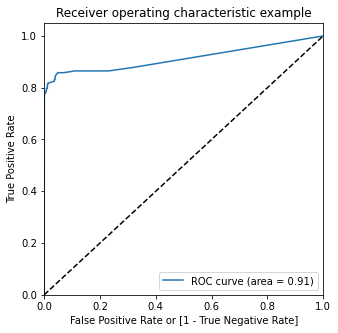

In [128]:
y_test_pred_proba_smote = dtr_smote_model.predict_proba(X_test)[:, 1]
draw_roc(y_test, y_test_pred_proba_smote)

In [129]:
# XGBoost

In [131]:
%%time

from xgboost import XGBClassifier

folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9],
             'max_depth': range(5,10,5)
             }          


# specify model
xgb_model_smote = XGBClassifier(n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model_smote, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Wall time: 3min 19s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'max_depth': range(5, 10, 5),
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [133]:
# mod_cv_results = pd.DataFrame(mod_cv.cv_results_)
# mod_cv_results
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)
print(model_cv.best_params_)

Best roc auc score :  0.9999883120386063
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
{'learning_rate': 0.2, 'max_depth': 5, 'subsample': 0.6}


In [134]:
# Printing best parameters
params = {'learning_rate': 0.2,
          'max_depth': 5, 
          'n_estimators':200,
          'subsample':0.6,
          'objective':'binary:logistic'}

# fit model on training data
xgb_model_smote = XGBClassifier(params = params)
xgb_model_smote.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6}, ...)

In [135]:
y_train_pred_smote = xgb_model_smote.predict(X_train_smote)

In [136]:
print("Accuracy:-",derive_metrics(y_train_smote,y_train_pred_smote)[0])
print("Sensitivity:-",derive_metrics(y_train_smote,y_train_pred_smote)[1])
print("Specificity:-", derive_metrics(y_train_smote,y_train_pred_smote)[2])
print("F1-Score:-", derive_metrics(y_train_smote,y_train_pred_smote)[3])

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0


In [137]:
# Predictions on the train set

display_scores(y_train_smote, y_train_pred_smote)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040



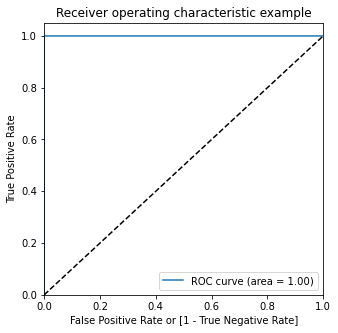

In [138]:
y_train_pred_proba_smote = xgb_model_smote.predict_proba(X_train_smote)[:, 1]
draw_roc(y_train_smote, y_train_pred_proba_smote)

In [139]:
y_test_pred_smote = xgb_model_smote.predict(X_test)
display_scores(y_test,y_test_pred_smote)
# print(classification_report(y_test, y_test_pred))

F1 Score: 79.21%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.77      0.81      0.79       148

    accuracy                           1.00     85443
   macro avg       0.89      0.91      0.90     85443
weighted avg       1.00      1.00      1.00     85443



In [140]:
print("Accuracy:-",derive_metrics(y_test,y_test_pred_smote)[0])
print("Sensitivity:-",derive_metrics(y_test,y_test_pred_smote)[1])
print("Specificity:-", derive_metrics(y_test,y_test_pred_smote)[2])
print("F1-Score:-", derive_metrics(y_test,y_test_pred_smote)[3])

Accuracy:- 0.9992626663389628
Sensitivity:- 0.8108108108108109
Specificity:- 0.9995896594173164
F1-Score:- 0.7920792079207922


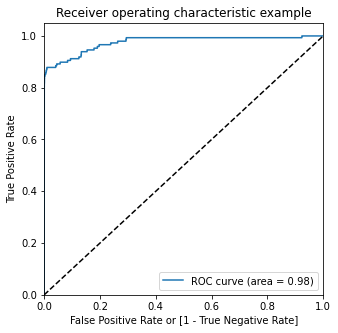

In [141]:
y_test_pred_proba_smote = xgb_model_smote.predict_proba(X_test)[:, 1]
draw_roc(y_test, y_test_pred_proba_smote)

In [253]:
# var_imp = []
# for i in log_model.feature_importances_:
#     var_imp.append(i)
# print('Top var =', var_imp.index(np.sort(log_model.feature_importances_)[-1])+1)
# print('2nd Top var =', var_imp.index(np.sort(log_model.feature_importances_)[-2])+1)
# print('3rd Top var =', var_imp.index(np.sort(log_model.feature_importances_)[-3])+1)

# # Variable on Index-16 and Index-13 seems to be the top 2 variables
# top_var_index = var_imp.index(np.sort(log_model.feature_importances_)[-1])
# second_top_var_index = var_imp.index(np.sort(log_model.feature_importances_)[-2])

# X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
# X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

# np.random.shuffle(X_train_0)

# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.rcParams['figure.figsize'] = [20, 20]

# plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
# plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
#             label='Actual Class-0 Examples')
# plt.legend()

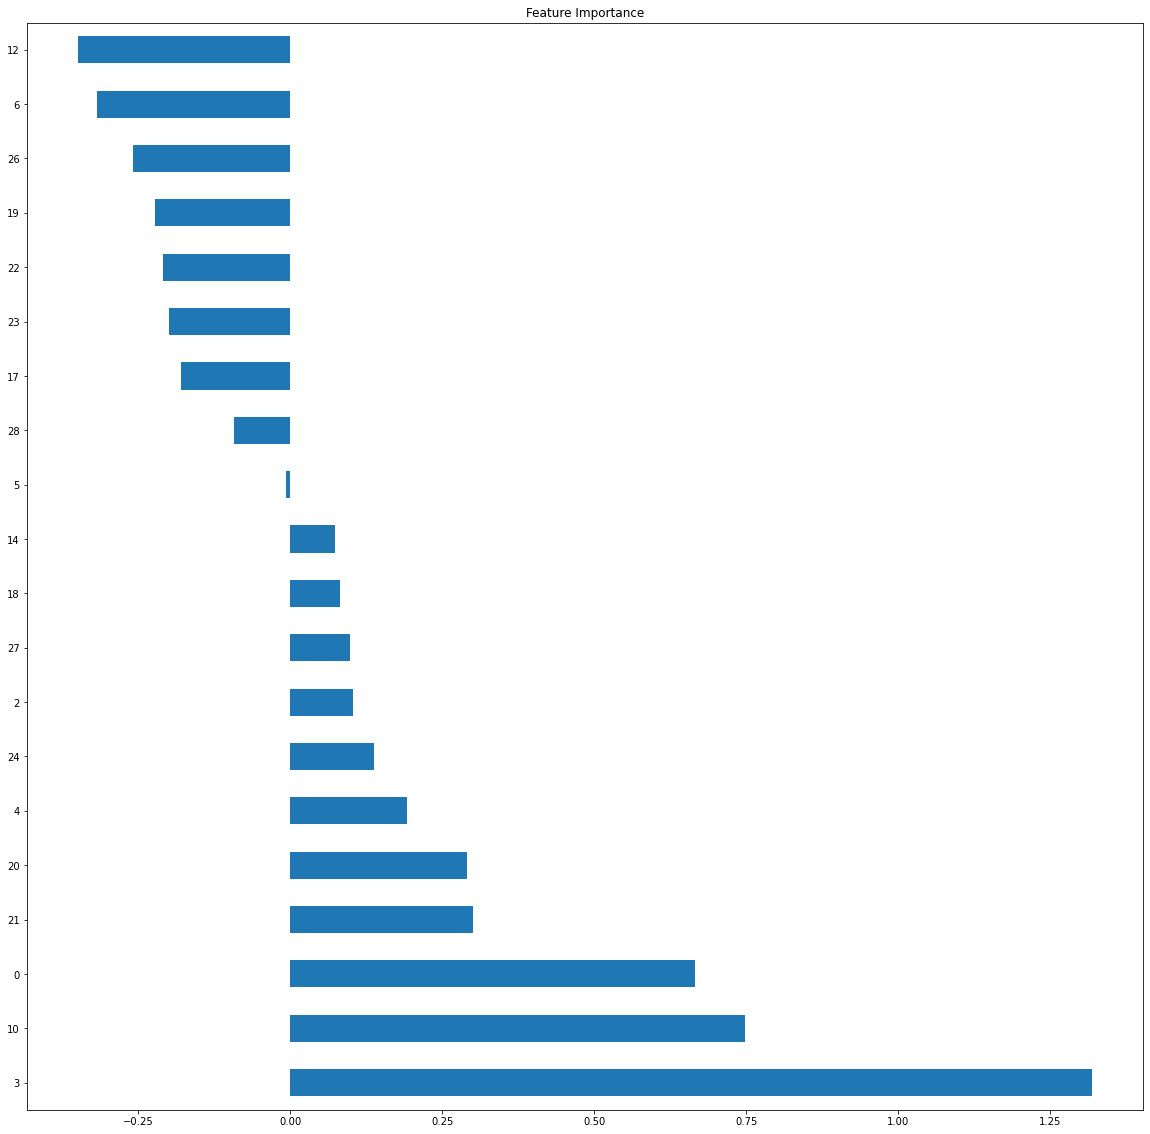

In [252]:
importance = log_model.coef_[0]
#importance is a list so you can plot it. 
feat_importances = pd.Series(importance)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')
plt.show()

In [145]:
print('Train auc =', metrics.roc_auc_score(y_train_smote, y_train_pred_proba_smote))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_pred_proba_smote)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 1.0
0.8180895


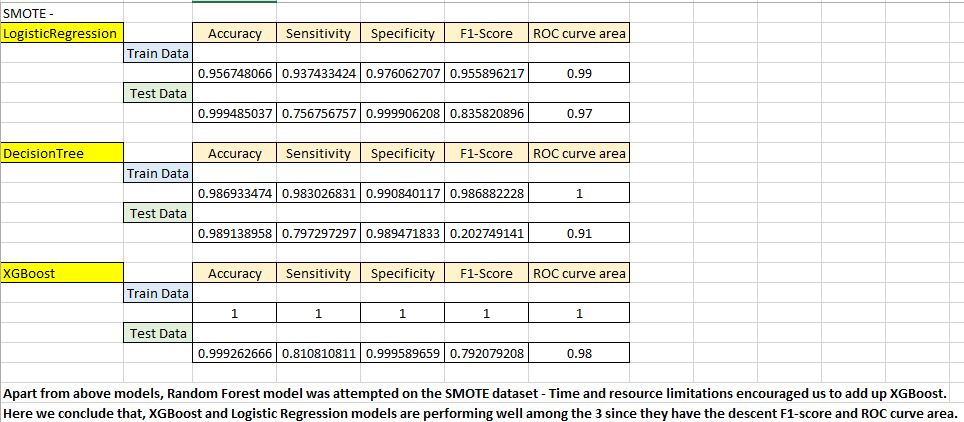

In [ ]:
# Over Sampling

In [147]:
from imblearn.over_sampling import RandomOverSampler

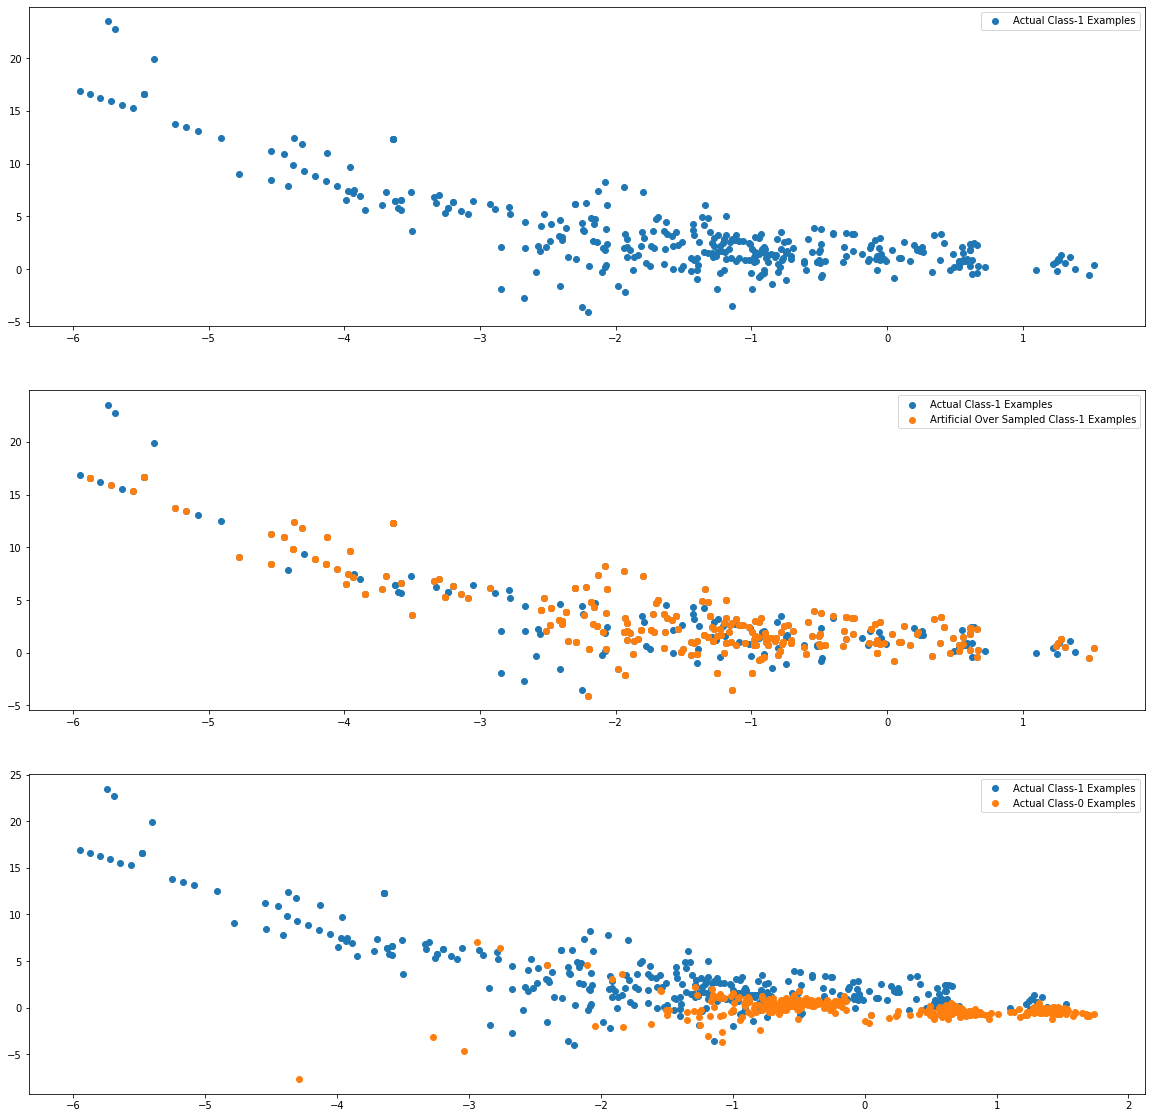

In [149]:
over_sm = RandomOverSampler(random_state=0)
X_train_over_sm, y_train_over_sm = over_sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_over_sm_1 = X_train_over_sm[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_over_sm_1.iloc[:X_train_1.shape[0], 0], X_train_over_sm_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial Over Sampled Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [150]:
y_train_over_sm.value_counts()

1    199020
0    199020
Name: Class, dtype: int64

In [151]:
# Logistic Regression

In [152]:
num_C = {"C": [0.01, 0.1, 1, 10, 100, 1000]}  #--> list of values
cv_num = KFold(n_splits=5, shuffle=True, random_state=4)  #--> list of values

In [153]:
#perform cross validation

model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = num_C, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 

#perform hyperparameter tuning
model_cv.fit(X_train_over_sm, y_train_over_sm)

#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9898436933516152
Best hyperparameters:  {'C': 1000}


In [154]:
log_model = LogisticRegression(C=1000)
log_model.fit(X_train_over_sm, y_train_over_sm)
y_train_pred_over_sm = log_model.predict(X_train_over_sm)

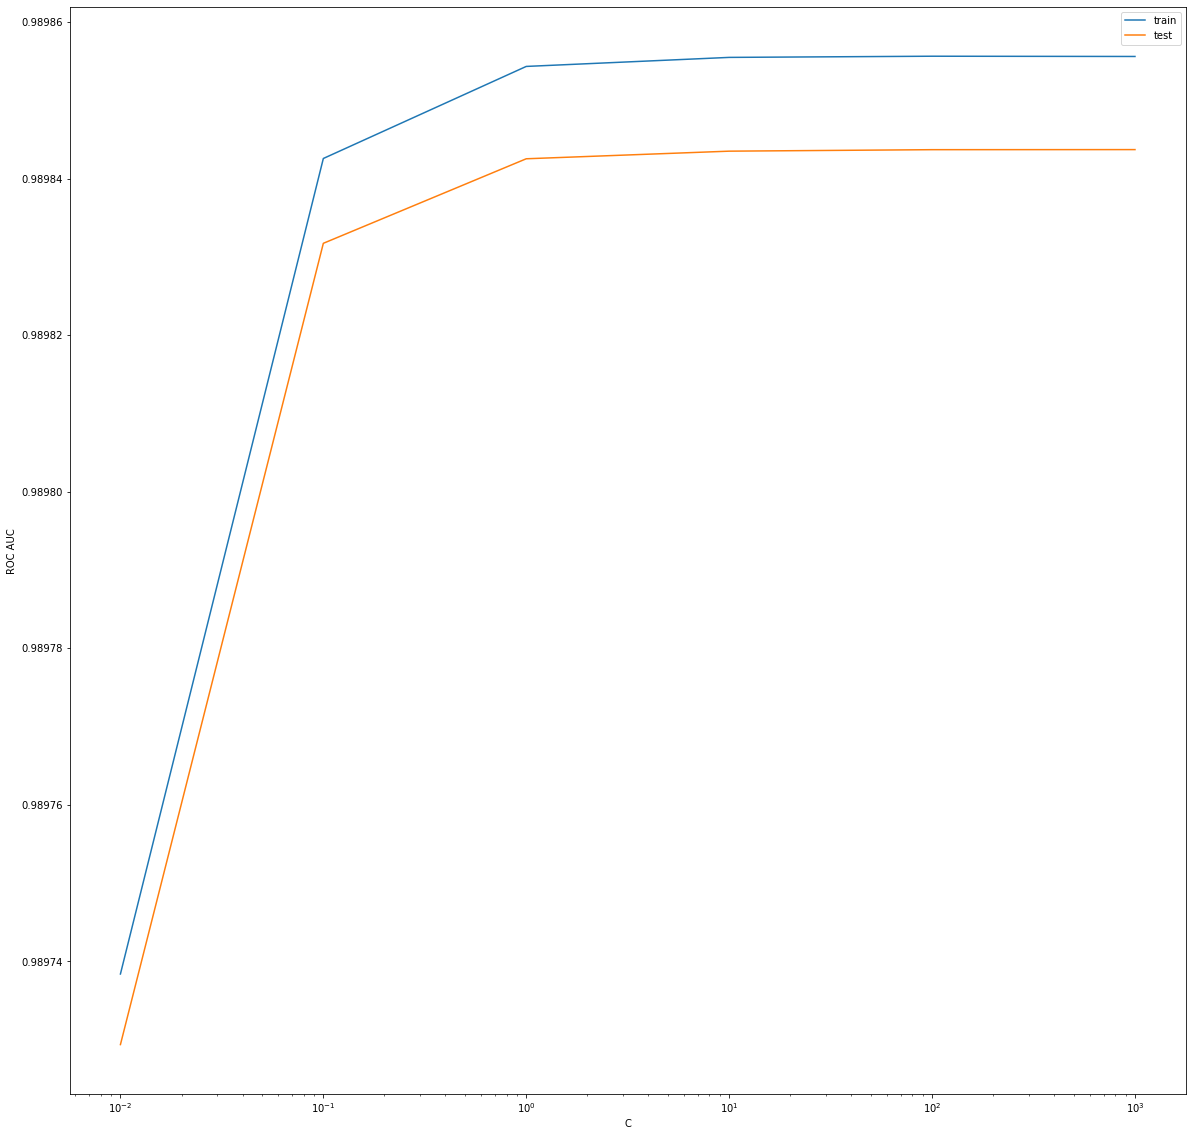

In [155]:
mod_cv_results = pd.DataFrame(model_cv.cv_results_)

plt.plot(mod_cv_results['param_C'], mod_cv_results['mean_train_score'])
plt.plot(mod_cv_results['param_C'], mod_cv_results['mean_test_score'])
plt.xlabel('C')
plt.ylabel('ROC AUC')
plt.xscale('log')
plt.legend(['train', 'test'])
plt.show()

In [157]:
print("Accuracy:-",derive_metrics(y_train_over_sm,y_train_pred_over_sm)[0])
print("Sensitivity:-",derive_metrics(y_train_over_sm,y_train_pred_over_sm)[1])
print("Specificity:-", derive_metrics(y_train_over_sm,y_train_pred_over_sm)[2])
print("F1-Score:-", derive_metrics(y_train_over_sm,y_train_pred_over_sm)[3])

Accuracy:- 0.9545724047834389
Sensitivity:- 0.9325344186513919
Specificity:- 0.9766103909154858
F1-Score:- 0.9535487119413875


In [158]:
display_scores(y_train_over_sm,y_train_pred_over_sm)

F1 Score: 95.35%
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96    199020
           1       0.98      0.93      0.95    199020

    accuracy                           0.95    398040
   macro avg       0.96      0.95      0.95    398040
weighted avg       0.96      0.95      0.95    398040



In [159]:
y_train_pred_proba_over_sm = log_model.predict_proba(X_train_over_sm)[:, 1]

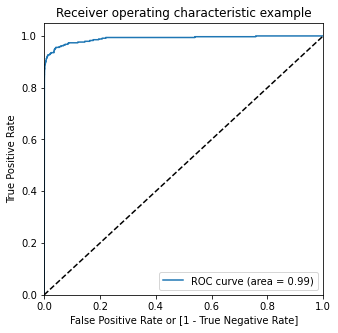

In [160]:
draw_roc(y_train_over_sm, y_train_pred_proba_over_sm)

In [161]:
y_test_pred_over_sm = log_model.predict(X_test)

In [162]:
print("Accuracy:-",derive_metrics(y_test,y_test_pred_over_sm)[0])
print("Sensitivity:-",derive_metrics(y_test,y_test_pred_over_sm)[1])
print("Specificity:-", derive_metrics(y_test,y_test_pred_over_sm)[2])
print("F1-Score:-", derive_metrics(y_test,y_test_pred_over_sm)[3])

Accuracy:- 0.9762414709221352
Sensitivity:- 0.8783783783783784
Specificity:- 0.9764112785040154
F1-Score:- 0.11353711790393013


In [163]:
display_scores(y_train_over_sm,y_train_pred_over_sm)

F1 Score: 95.35%
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96    199020
           1       0.98      0.93      0.95    199020

    accuracy                           0.95    398040
   macro avg       0.96      0.95      0.95    398040
weighted avg       0.96      0.95      0.95    398040



In [164]:
y_test_pred_proba_over_sm = log_model.predict_proba(X_test)[:, 1]

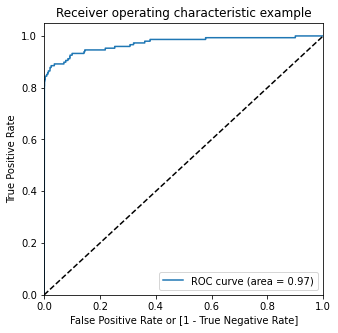

In [165]:
draw_roc(y_test, y_test_pred_proba_over_sm)

In [166]:
# Decsion Tree

In [167]:
param_grid = {
    'max_depth' : range(5, 15, 5),
    'min_samples_leaf' : range(50, 150, 50),
    'min_samples_split' : range(50, 150, 50)
}

dtr_over_sm = DecisionTreeClassifier()

mod_cv = GridSearchCV(estimator = dtr_over_sm,
                     param_grid = param_grid,
                     scoring = 'roc_auc',
                     cv = 3,
                     n_jobs = -1,
                     verbose = 1)
mod_cv.fit(X_train_over_sm, y_train_over_sm)
print(mod_cv.best_score_)
print(mod_cv.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
0.9996139095965771
{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 100}


In [168]:
# mod_cv_results = pd.DataFrame(mod_cv.cv_results_)

In [170]:
# Fit model with the best params
dtr_model_over_sm = DecisionTreeClassifier(criterion = 'gini',
                                  random_state = 100,
                                  max_depth = 10,
                                  min_samples_leaf = 50,
                                  min_samples_split = 100
                                  )

dtr_model_over_sm.fit(X_train_over_sm, y_train_over_sm)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

In [171]:
y_train_pred_over_sm = dtr_model_over_sm.predict(X_train_over_sm)
# print(classification_report(y_train, y_train_pred))

In [172]:
print("Accuracy:-",derive_metrics(y_train_over_sm,y_train_pred_over_sm)[0])
print("Sensitivity:-",derive_metrics(y_train_over_sm,y_train_pred_over_sm)[1])
print("Specificity:-", derive_metrics(y_train_over_sm,y_train_pred_over_sm)[2])
print("F1-Score:-", derive_metrics(y_train_over_sm,y_train_pred_over_sm)[3])

Accuracy:- 0.9984574414631695
Sensitivity:- 1.0
Specificity:- 0.996914882926339
F1-Score:- 0.9984598172851645


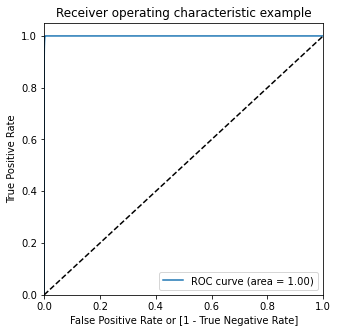

In [173]:
y_train_pred_proba_over_sm = dtr_model_over_sm.predict_proba(X_train_over_sm)[:, 1]
draw_roc(y_train_over_sm, y_train_pred_proba_over_sm)

In [174]:
display_scores(y_train_over_sm,y_train_pred_over_sm)

F1 Score: 99.85%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040



In [175]:
y_test_pred_over_sm = dtr_model_over_sm.predict(X_test)
display_scores(y_test,y_test_pred_over_sm)

F1 Score: 40.4%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.27      0.81      0.40       148

    accuracy                           1.00     85443
   macro avg       0.63      0.90      0.70     85443
weighted avg       1.00      1.00      1.00     85443



In [176]:
print("Accuracy:-",derive_metrics(y_test,y_test_pred_over_sm)[0])
print("Sensitivity:-",derive_metrics(y_test,y_test_pred_over_sm)[1])
print("Specificity:-", derive_metrics(y_test,y_test_pred_over_sm)[2])
print("F1-Score:-", derive_metrics(y_test,y_test_pred_over_sm)[3])

Accuracy:- 0.9958568870475053
Sensitivity:- 0.8108108108108109
Specificity:- 0.9961779705727182
F1-Score:- 0.40404040404040403


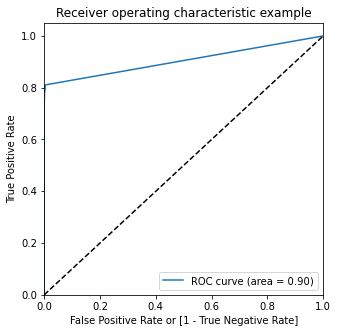

In [177]:
y_test_pred_proba_over_sm = dtr_model_over_sm.predict_proba(X_test)[:, 1]
draw_roc(y_test, y_test_pred_proba_over_sm)

In [178]:
# XGBoost

In [179]:
%%time

from xgboost import XGBClassifier

folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9],
             'max_depth': range(5,10,5)
             }          


# specify model
xgb_model_over_sm = XGBClassifier(n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model_over_sm, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_over_sm, y_train_over_sm)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Wall time: 3min 23s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'max_depth': range(5, 10, 5),
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [180]:
# mod_cv_results = pd.DataFrame(mod_cv.cv_results_)
# mod_cv_results
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)
print(model_cv.best_params_)

Best roc auc score :  0.9999889612856389
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
{'learning_rate': 0.2, 'max_depth': 5, 'subsample': 0.6}


In [181]:
# Printing best parameters
params = {'learning_rate': 0.2,
          'max_depth': 5, 
          'n_estimators':200,
          'subsample':0.6,
          'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train_over_sm, y_train_over_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6}, ...)

In [182]:
y_train_pred_over_sm = xgb_imb_model.predict(X_train_over_sm)

In [183]:
print("Accuracy:-",derive_metrics(y_train_over_sm,y_train_pred_over_sm)[0])
print("Sensitivity:-",derive_metrics(y_train_over_sm,y_train_pred_over_sm)[1])
print("Specificity:-", derive_metrics(y_train_over_sm,y_train_pred_over_sm)[2])
print("F1-Score:-", derive_metrics(y_train_over_sm,y_train_pred_over_sm)[3])

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0


In [184]:
# Predictions on the train set

display_scores(y_train_over_sm, y_train_pred_over_sm)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040



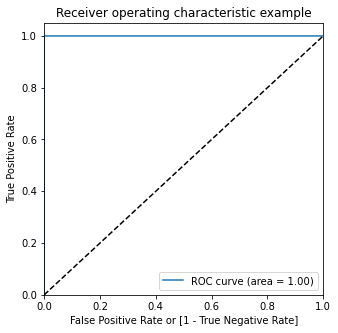

In [185]:
y_train_pred_proba_over_sm = xgb_imb_model.predict_proba(X_train_over_sm)[:, 1]
draw_roc(y_train_over_sm, y_train_pred_proba_over_sm)

In [186]:
y_test_pred_over_sm = xgb_imb_model.predict(X_test)
display_scores(y_test,y_test_pred_over_sm)
# print(classification_report(y_test, y_test_pred))

F1 Score: 83.75%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.90      0.78      0.84       148

    accuracy                           1.00     85443
   macro avg       0.95      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [187]:
print("Accuracy:-",derive_metrics(y_test,y_test_pred_over_sm)[0])
print("Sensitivity:-",derive_metrics(y_test,y_test_pred_over_sm)[1])
print("Specificity:-", derive_metrics(y_test,y_test_pred_over_sm)[2])
print("F1-Score:-", derive_metrics(y_test,y_test_pred_over_sm)[3])

Accuracy:- 0.9994733330992591
Sensitivity:- 0.7837837837837838
Specificity:- 0.9998475877835746
F1-Score:- 0.8375451263537905


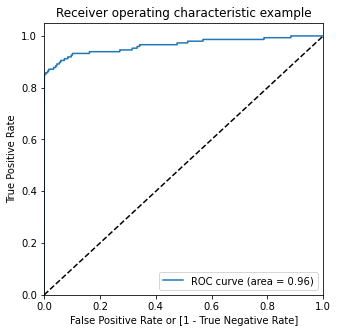

In [188]:
y_test_pred_proba_over_sm = xgb_imb_model.predict_proba(X_test)[:, 1]
draw_roc(y_test, y_test_pred_proba_over_sm)

Top var = 14
2nd Top var = 4
3rd Top var = 12


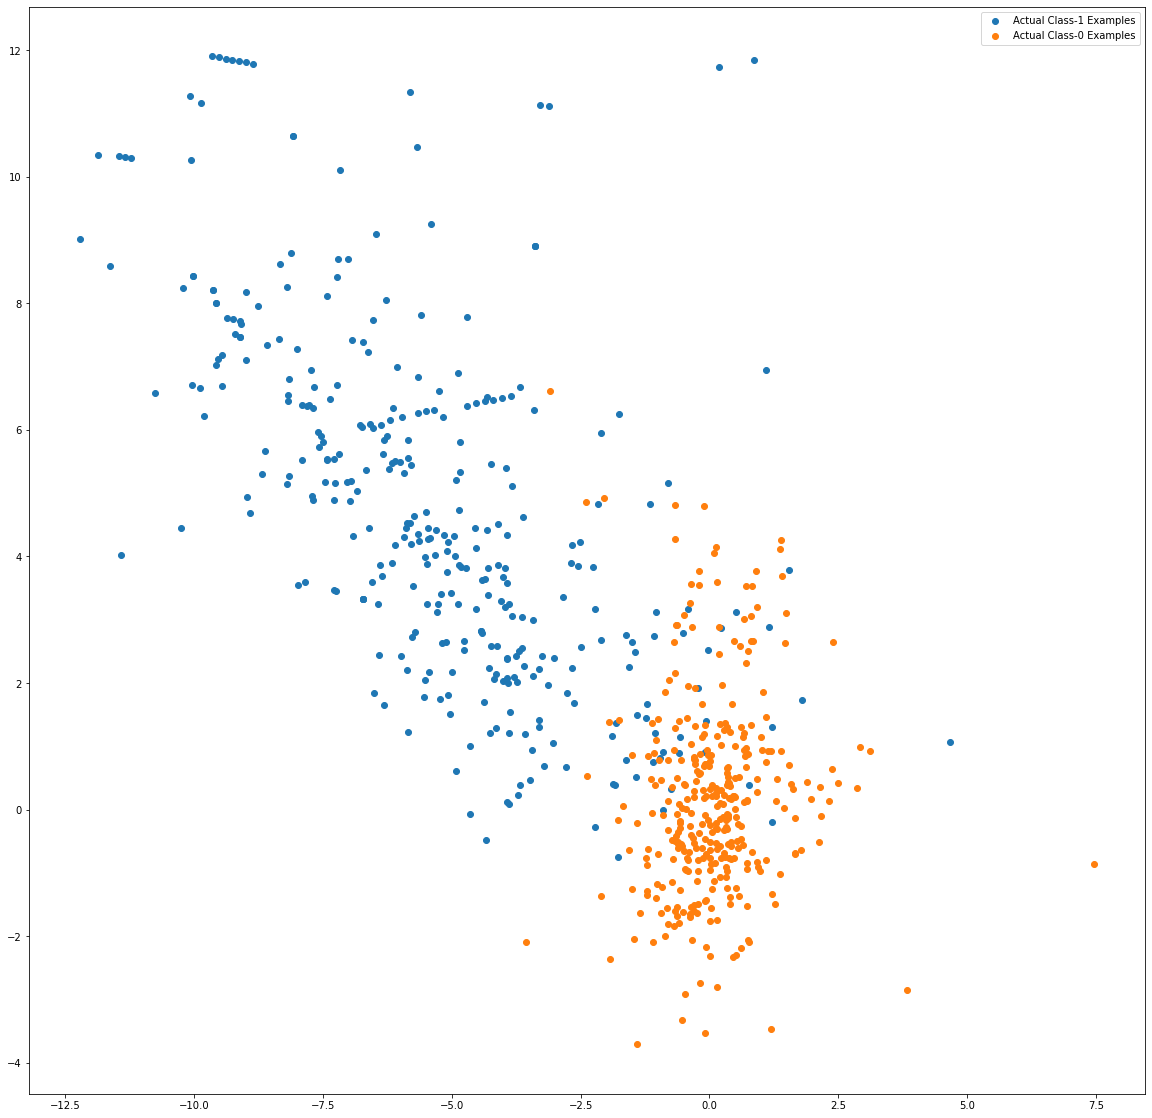

In [189]:
var_imp = []
for i in xgb_imb_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [191]:
print('Train auc =', metrics.roc_auc_score(y_train_over_sm, y_train_pred_proba_over_sm))
fpr, tpr, thresholds = metrics.roc_curve(y_train_over_sm, y_train_pred_proba_over_sm)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.999909343025827
0.8384728340675477


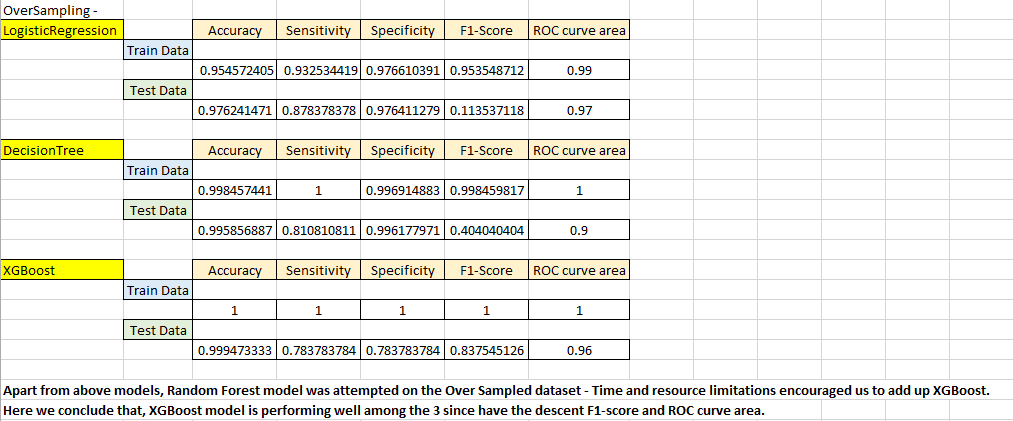

In [192]:
# ADASYN

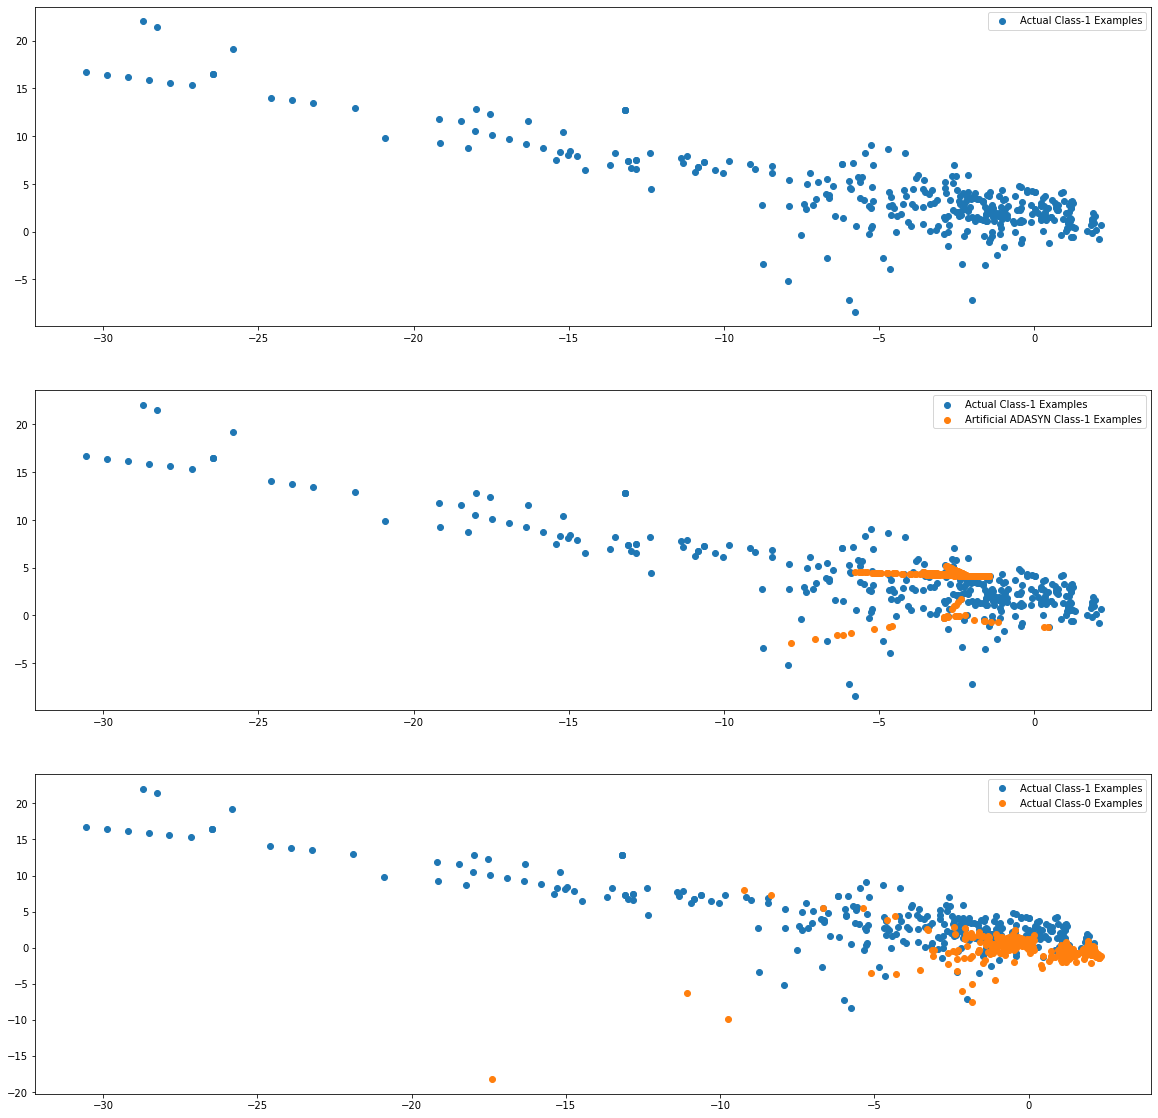

In [43]:
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import ADASYN


ad = ADASYN(random_state=0)
X_train_ad, y_train_ad = ad.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_ad_1 = X_train_ad[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_ad_1.iloc[:X_train_1.shape[0], 0], X_train_ad_1.iloc[:X_train_1.shape[0], 1], label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [195]:
y_train_ad.value_counts()

1    199023
0    199020
Name: Class, dtype: int64

In [40]:
# Logistic Regression

In [41]:
num_C = {"C": [0.01, 0.1, 1, 10, 100, 1000]}  #--> list of values
cv_num = KFold(n_splits=5, shuffle=True, random_state=4)  #--> list of values

In [44]:
#perform cross validation

model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = num_C, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 

#perform hyperparameter tuning
model_cv.fit(X_train_ad, y_train_ad)

#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9876375320082691
Best hyperparameters:  {'C': 0.1}


In [45]:
log_model = LogisticRegression(C=0.1)
log_model.fit(X_train_ad, y_train_ad)
y_train_pred_ad = log_model.predict(X_train_ad)

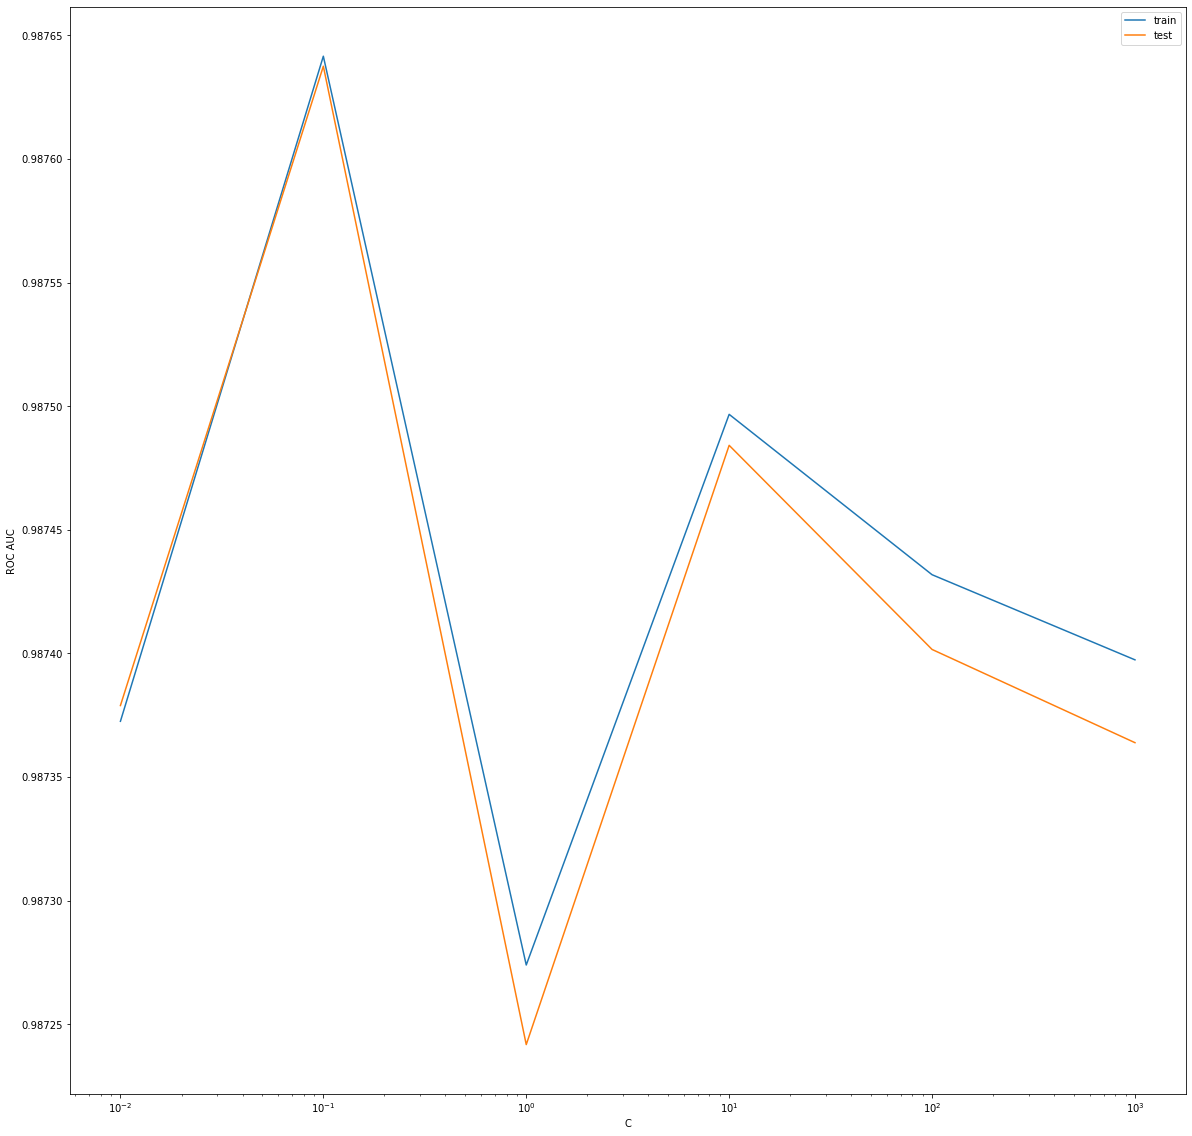

In [46]:
mod_cv_results = pd.DataFrame(model_cv.cv_results_)

plt.plot(mod_cv_results['param_C'], mod_cv_results['mean_train_score'])
plt.plot(mod_cv_results['param_C'], mod_cv_results['mean_test_score'])
plt.xlabel('C')
plt.ylabel('ROC AUC')
plt.xscale('log')
plt.legend(['train', 'test'])
plt.show()

In [201]:
print("Accuracy:-",derive_metrics(y_train_ad,y_train_pred_ad)[0])
print("Sensitivity:-",derive_metrics(y_train_ad,y_train_pred_ad)[1])
print("Specificity:-", derive_metrics(y_train_ad,y_train_pred_ad)[2])
print("F1-Score:-", derive_metrics(y_train_ad,y_train_pred_ad)[3])

Accuracy:- 0.9022693528086162
Sensitivity:- 0.8859478552730087
Specificity:- 0.9185910963722239
F1-Score:- 0.9006484501301243


In [202]:
display_scores(y_train_ad,y_train_pred_ad)

F1 Score: 90.06%
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.92      0.90    199020
           1       0.92      0.89      0.90    199023

    accuracy                           0.90    398043
   macro avg       0.90      0.90      0.90    398043
weighted avg       0.90      0.90      0.90    398043



In [203]:
y_train_pred_proba_ad = log_model.predict_proba(X_train_ad)[:, 1]

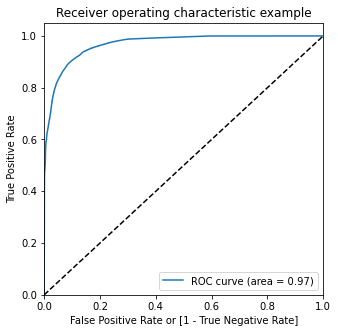

In [204]:
draw_roc(y_train_ad, y_train_pred_proba_ad)

In [48]:
y_test_pred_ad = log_model.predict(X_test)

In [206]:
print("Accuracy:-",derive_metrics(y_test,y_test_pred_ad)[0])
print("Sensitivity:-",derive_metrics(y_test,y_test_pred_ad)[1])
print("Specificity:-", derive_metrics(y_test,y_test_pred_ad)[2])
print("F1-Score:-", derive_metrics(y_test,y_test_pred_ad)[3])

Accuracy:- 0.9173250002925927
Sensitivity:- 0.8918918918918919
Specificity:- 0.9173691306641656
F1-Score:- 0.036026200873362446


In [49]:
display_scores(y_test,y_test_pred_ad)

F1 Score: 6.22%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.95      0.98     85295
           1       0.03      0.86      0.06       148

    accuracy                           0.95     85443
   macro avg       0.52      0.91      0.52     85443
weighted avg       1.00      0.95      0.98     85443



In [208]:
y_test_pred_proba_ad = log_model.predict_proba(X_test)[:, 1]

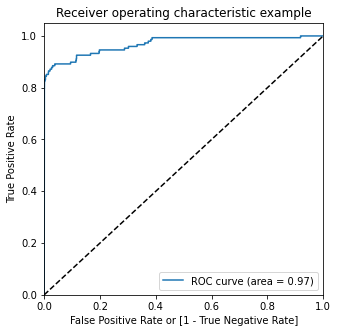

In [209]:
draw_roc(y_test, y_test_pred_proba_ad)

In [210]:
# Decsion Tree

In [211]:
param_grid = {
    'max_depth' : range(5, 15, 5),
    'min_samples_leaf' : range(50, 150, 50),
    'min_samples_split' : range(50, 150, 50)
}

dtr_ad = DecisionTreeClassifier()

mod_cv = GridSearchCV(estimator = dtr_ad,
                     param_grid = param_grid,
                     scoring = 'roc_auc',
                     cv = 3,
                     n_jobs = -1,
                     verbose = 1)
mod_cv.fit(X_train_ad, y_train_ad)
print(mod_cv.best_score_)
print(mod_cv.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
0.9407768700175728
{'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 50}


In [212]:
# mod_cv_results = pd.DataFrame(mod_cv.cv_results_)

In [213]:
# Fit model with the best params
dtr_model_ad = DecisionTreeClassifier(criterion = 'gini',
                                  random_state = 100,
                                  max_depth = 10,
                                  min_samples_leaf = 100,
                                  min_samples_split = 50
                                  )

dtr_model_ad.fit(X_train_ad, y_train_ad)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

In [214]:
y_train_pred_ad = dtr_model_ad.predict(X_train_ad)
# print(classification_report(y_train, y_train_pred))

In [215]:
print("Accuracy:-",derive_metrics(y_train_ad,y_train_pred_ad)[0])
print("Sensitivity:-",derive_metrics(y_train_ad,y_train_pred_ad)[1])
print("Specificity:-", derive_metrics(y_train_ad,y_train_pred_ad)[2])
print("F1-Score:-", derive_metrics(y_train_ad,y_train_pred_ad)[3])

Accuracy:- 0.9793615262672626
Sensitivity:- 0.9916140345588198
Specificity:- 0.9671088332830872
F1-Score:- 0.9796114890438123


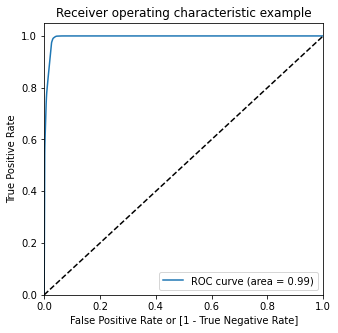

In [218]:
y_train_pred_proba_ad = dtr_model_ad.predict_proba(X_train_ad)[:, 1]
draw_roc(y_train_ad, y_train_pred_proba_ad)

In [217]:
display_scores(y_train_ad,y_train_pred_ad)

F1 Score: 97.96%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98    199020
           1       0.97      0.99      0.98    199023

    accuracy                           0.98    398043
   macro avg       0.98      0.98      0.98    398043
weighted avg       0.98      0.98      0.98    398043



In [219]:
y_test_pred_ad = dtr_model_ad.predict(X_test)
display_scores(y_test,y_test_pred_ad)

F1 Score: 7.73%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     85295
           1       0.04      0.83      0.08       148

    accuracy                           0.97     85443
   macro avg       0.52      0.90      0.53     85443
weighted avg       1.00      0.97      0.98     85443



In [220]:
print("Accuracy:-",derive_metrics(y_test,y_test_pred_ad)[0])
print("Sensitivity:-",derive_metrics(y_test,y_test_pred_ad)[1])
print("Specificity:-", derive_metrics(y_test,y_test_pred_ad)[2])
print("F1-Score:-", derive_metrics(y_test,y_test_pred_ad)[3])

Accuracy:- 0.9656145032360756
Sensitivity:- 0.831081081081081
Specificity:- 0.9658479395040741
F1-Score:- 0.07726130653266332


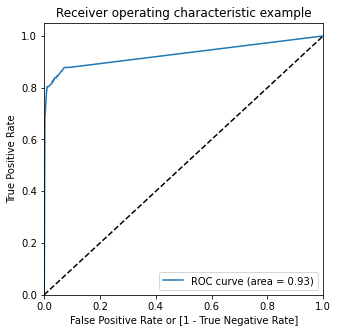

In [221]:
y_test_pred_proba_ad = dtr_model_ad.predict_proba(X_test)[:, 1]
draw_roc(y_test, y_test_pred_proba_ad)

In [222]:
# XGBoost

In [223]:
%%time

from xgboost import XGBClassifier

folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9],
             'max_depth': range(5,10,5)
             }          


# specify model
xgb_model_ad = XGBClassifier(n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_ad, y_train_ad)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Wall time: 3min 44s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'max_depth': range(5, 10, 5),
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [224]:
# mod_cv_results = pd.DataFrame(mod_cv.cv_results_)
# mod_cv_results
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)
print(model_cv.best_params_)

Best roc auc score :  0.999141858286745
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
{'learning_rate': 0.6, 'max_depth': 5, 'subsample': 0.6}


In [226]:
# Printing best parameters
params = {'learning_rate': 0.6,
          'max_depth': 5, 
          'n_estimators':200,
          'subsample':0.6,
          'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model_ad = XGBClassifier(params = params)
xgb_imb_model_ad.fit(X_train_ad, y_train_ad)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 5, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6}, ...)

In [227]:
y_train_pred_ad = xgb_imb_model_ad.predict(X_train_ad)

In [228]:
print("Accuracy:-",derive_metrics(y_train_ad,y_train_pred_ad)[0])
print("Sensitivity:-",derive_metrics(y_train_ad,y_train_pred_ad)[1])
print("Specificity:-", derive_metrics(y_train_ad,y_train_pred_ad)[2])
print("F1-Score:-", derive_metrics(y_train_ad,y_train_pred_ad)[3])

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0


In [229]:
# Predictions on the train set

display_scores(y_train_ad, y_train_pred_ad)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199023

    accuracy                           1.00    398043
   macro avg       1.00      1.00      1.00    398043
weighted avg       1.00      1.00      1.00    398043



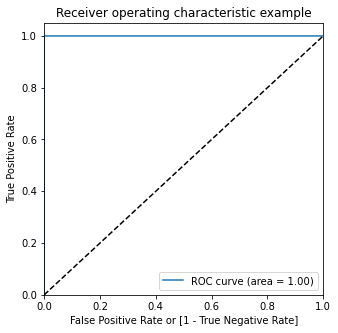

In [230]:
y_train_pred_proba_ad = xgb_imb_model_ad.predict_proba(X_train_ad)[:, 1]
draw_roc(y_train_ad, y_train_pred_proba_ad)

In [231]:
y_test_pred_ad = xgb_imb_model_ad.predict(X_test)
display_scores(y_test,y_test_pred_ad)
# print(classification_report(y_test, y_test_pred))

F1 Score: 75.71%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.71      0.81      0.76       148

    accuracy                           1.00     85443
   macro avg       0.85      0.91      0.88     85443
weighted avg       1.00      1.00      1.00     85443



In [232]:
print("Accuracy:-",derive_metrics(y_test,y_test_pred_ad)[0])
print("Sensitivity:-",derive_metrics(y_test,y_test_pred_ad)[1])
print("Specificity:-", derive_metrics(y_test,y_test_pred_ad)[2])
print("F1-Score:-", derive_metrics(y_test,y_test_pred_ad)[3])

Accuracy:- 0.9990988144142879
Sensitivity:- 0.8108108108108109
Specificity:- 0.9994255231842429
F1-Score:- 0.7570977917981072


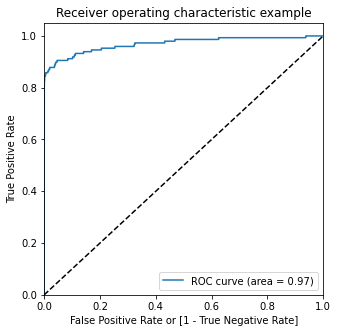

In [233]:
y_test_pred_proba_ad = xgb_imb_model_ad.predict_proba(X_test)[:, 1]
draw_roc(y_test, y_test_pred_proba_ad)

Top var = 14
2nd Top var = 4
3rd Top var = 8


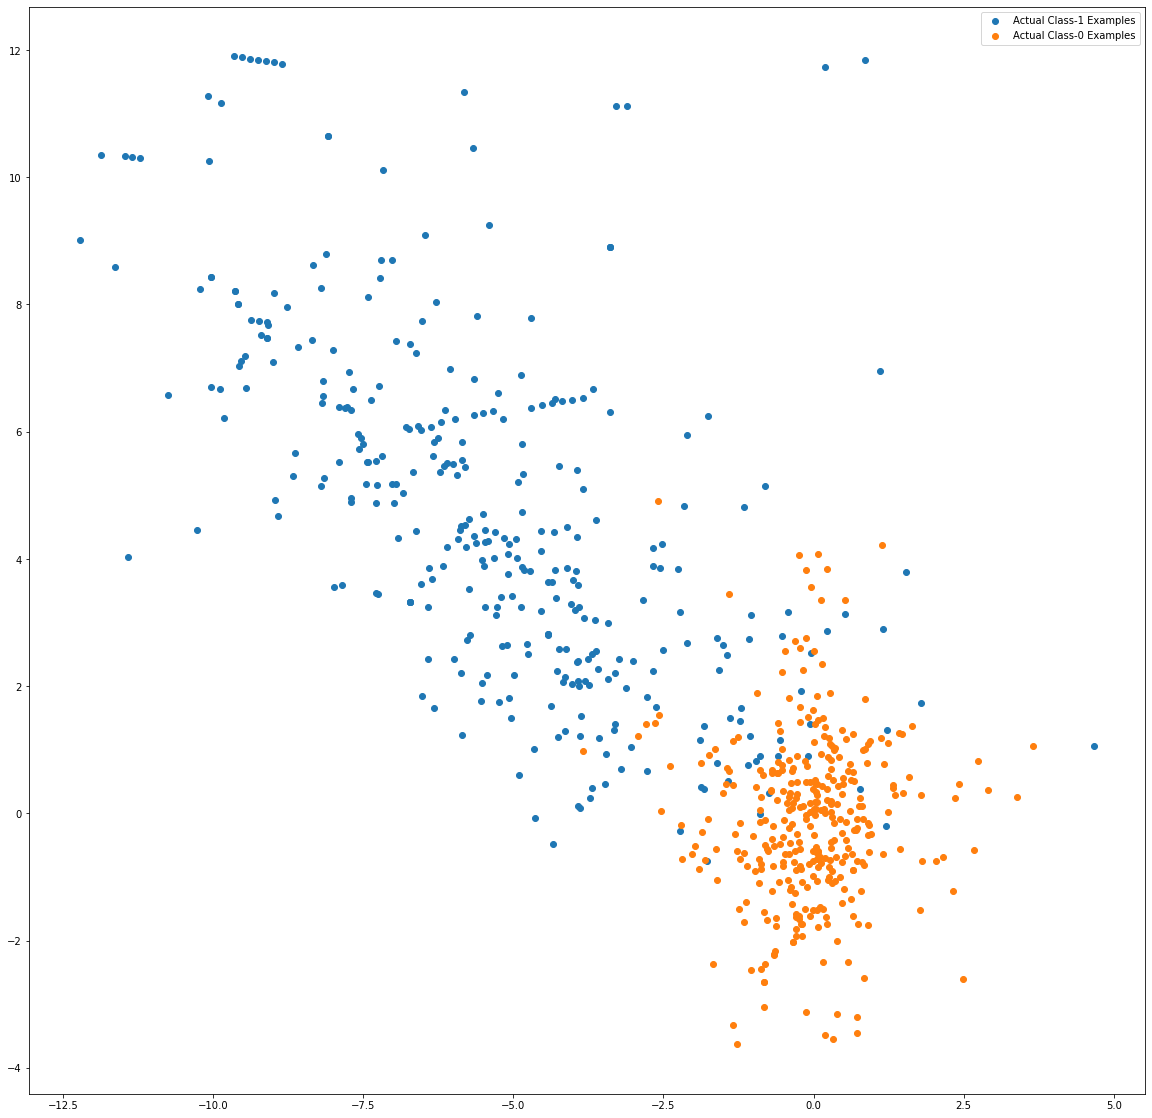

In [234]:
var_imp = []
for i in xgb_imb_model_ad.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_imb_model_ad.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imb_model_ad.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imb_model_ad.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_imb_model_ad.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imb_model_ad.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [235]:
print('Train auc =', metrics.roc_auc_score(y_train_ad, y_train_pred_proba_ad))
fpr, tpr, thresholds = metrics.roc_curve(y_train_ad, y_train_pred_proba_ad)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 1.0
0.950169


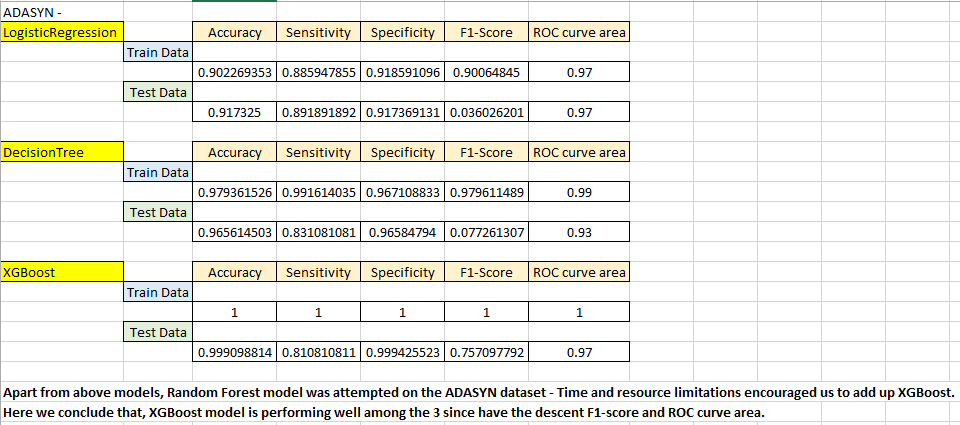

Hence finally we conclude that the XGBoost model can be used from any of the balanced dataset since it is doing well on test data-set in terms of ROC curve area and F1-score as well. 
If any resource and time crunches, logistic Regression model from SMOTE balanced data-set can be used for better results which is simpler and lighter model. 